In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
state_list = df['State'].value_counts()
state_list

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

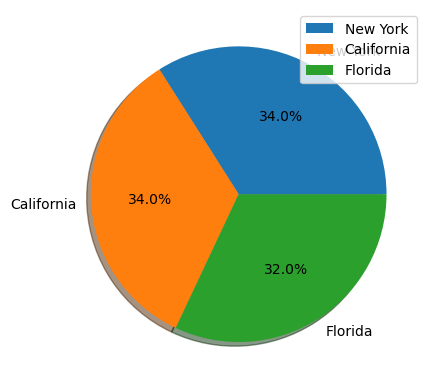

In [7]:
values = ['New York', 'California', 'Florida']
plt.pie(state_list, labels=values,shadow=True, autopct='%1.1f%%')
plt.legend()

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
x = df.iloc[:,:-1]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
y = df.iloc[:,-1]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

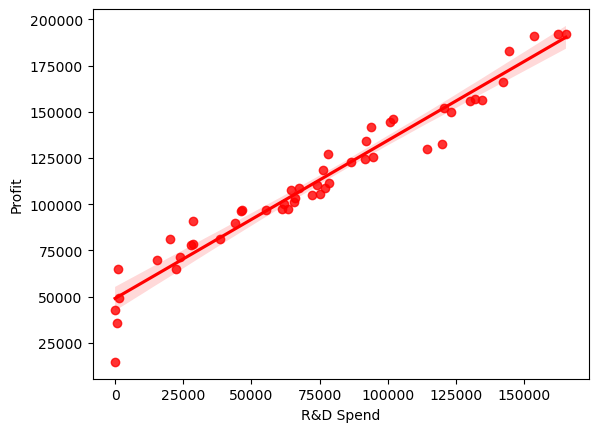

In [11]:
sns.regplot(x=df['R&D Spend'],y=y, color='r')

<Axes: xlabel='Administration', ylabel='Profit'>

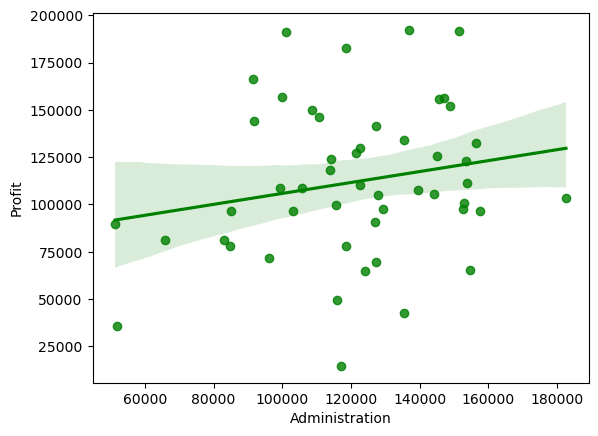

In [12]:
sns.regplot(x=df['Administration'],y=y, color='g')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

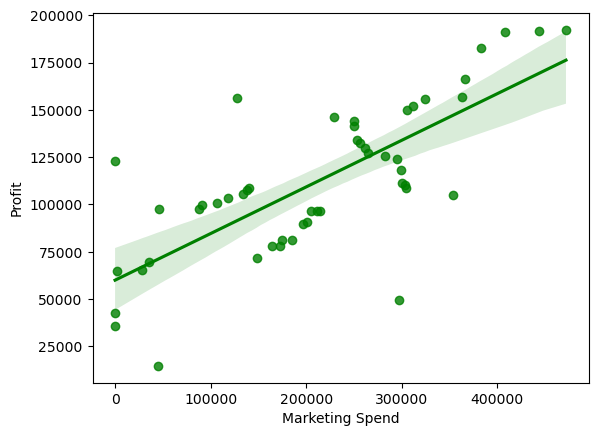

In [13]:
sns.regplot(x=df['Marketing Spend'],y=y, color='g')

In [14]:
from sklearn.preprocessing import OneHotEncoder
dummies = pd.get_dummies(df.State)
dummies.head()

,California,Florida,New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


In [15]:
dummies = pd.get_dummies(df.State, dtype='int')
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [16]:
df1 = pd.concat([df, dummies], axis='columns')
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [17]:
df2 = df1.drop(['State'], axis=1)
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [18]:
x = df2.drop(['Profit'], axis=1)
y = df2['Profit']

In [19]:
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
x_train

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
41,27892.92,84710.77,164470.71,0,1,0
23,67532.53,105751.03,304768.73,0,1,0
36,28663.76,127056.21,201126.82,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
13,91992.39,135495.07,252664.93,1,0,0
39,38558.51,82982.09,174999.30,1,0,0
17,94657.16,145077.58,282574.31,0,0,1
43,15505.73,127382.30,35534.17,0,0,1
24,77044.01,99281.34,140574.81,0,0,1
3,144372.41,118671.85,383199.62,0,0,1


In [22]:
x_test

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
33,55493.95,103057.49,214634.81,0,1,0
29,65605.48,153032.06,107138.38,0,0,1
49,0.00,116983.80,45173.06,1,0,0
38,20229.59,65947.93,185265.10,0,0,1
45,1000.23,124153.04,1903.93,0,0,1
0,165349.20,136897.80,471784.10,0,0,1
18,91749.16,114175.79,294919.57,0,1,0
4,142107.34,91391.77,366168.42,0,1,0
11,100671.96,91790.61,249744.55,1,0,0
2,153441.51,101145.55,407934.54,0,1,0


In [23]:
y_train

41     77798.83
23    108733.99
36     90708.19
5     156991.12
13    134307.35
39     81005.76
17    125370.37
43     69758.98
24    108552.04
3     182901.99
22    110352.25
40     78239.91
26    105733.54
34     96712.80
20    118474.03
28    103282.38
14    132602.65
15    129917.04
30     99937.59
8     152211.77
46     49490.75
32     97427.84
9     149759.96
48     35673.41
42     71498.49
10    146121.95
31     97483.56
19    122776.86
47     42559.73
12    141585.52
1     191792.06
37     89949.14
7     155752.60
27    105008.31
6     156122.51
Name: Profit, dtype: float64

In [24]:
y_test

33     96778.92
29    101004.64
49     14681.40
38     81229.06
45     64926.08
0     192261.83
18    124266.90
4     166187.94
11    144259.40
2     191050.39
16    126992.93
35     96479.51
25    107404.34
21    111313.02
44     65200.33
Name: Profit, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [26]:
trained_model_score = model.score(x_train,y_train)
print (f"model score in Training data is {trained_model_score}%")

test_model_score = model.score(x_test,y_test)
print (f"model score in Testing data is {test_model_score}%")

model score in Training data is 0.9616584293364052%
model score in Testing data is 0.9281444810397639%
